# Cells Alignment

## 0. Import libraries

In [1]:
import skimage.io as io
import AFT_tools as AFT
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray

## 1. Import the image

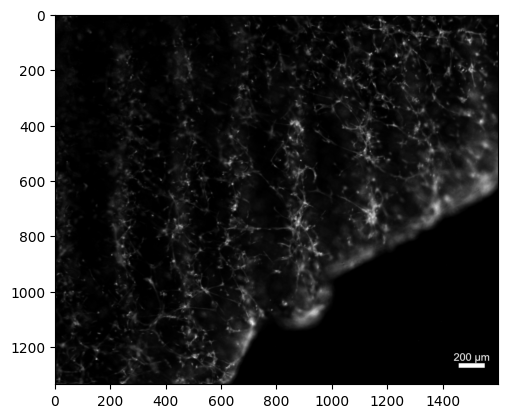

In [9]:
PATH = r"chava/WhatsApp Image 2025-04-18 at 19.43.11(5).jpeg"
imag = io.imread(PATH)
imag = rgb2gray(imag)
plt.imshow(imag, cmap= 'gray')

## 2. Modify image if necessary

`Rotation`
`Cropped`

In [10]:
import cv2

def rotate_image(image, angle, crop_factor, off_axis_horizontal = 0, off_axis_vertical = 0):
    """
    Rotates the given image by the specified angle.
    
    Parameters:
        image: numpy.ndarray
            The input image.
        angle: float
            The angle of rotation in degrees.
    
    Returns:
        numpy.ndarray
            The rotated image.
    """
    # Get the height and width of the image
    height, width = image.shape[:2]
    
    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    
    # Perform the affine transformation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    rotated_height, rotated_width = rotated_image.shape[:2]
    
    crop_height = int(rotated_height * crop_factor)
    crop_width = int(rotated_width * crop_factor)
    
    # Calculate the position to crop the central piece
    crop_x = (rotated_width - crop_width) // 2 + off_axis_horizontal
    crop_y = (rotated_height - crop_height) // 2 + off_axis_vertical
    
    # Crop the central piece from the rotated image
    cropped_image = rotated_image[crop_y:crop_y+crop_height, crop_x:crop_x+crop_width]
    
    return cropped_image


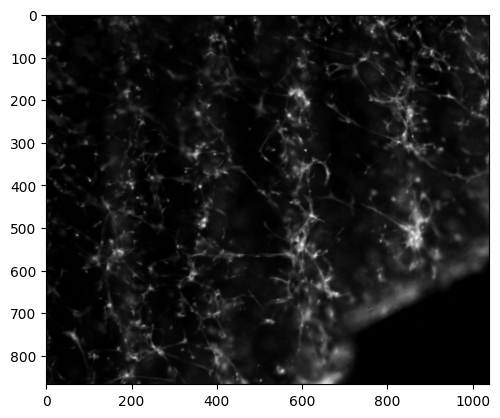

In [11]:
rotated_image = rotate_image(image = imag, 
                            angle = 0,
                            crop_factor = 0.65,
                            off_axis_horizontal= 0,
                            off_axis_vertical = -25)
plt.imshow(rotated_image, cmap= 'gray')

## 3. Calculate the local orientation

In [ ]:
# AFT parameters

#### required parameters ####
window_size = 40
overlap = 0.7
neighborhood_radius = 5

#### optional parameters ####
intensity_threshold = 0
eccentricity_threshold = 1
#im_mask = io.imread('mask').astype('bool')

#### output parameters ####
plot_overlay = True
plot_angles = True
plot_eccentricity = True
save_figures = True
data_save_path = 'output_data/'

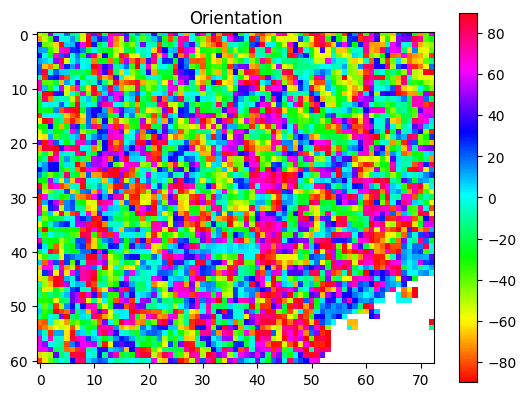

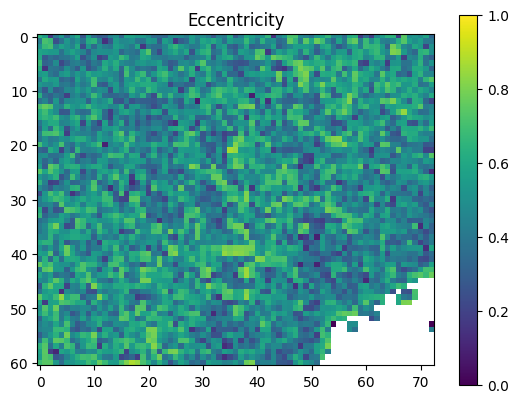

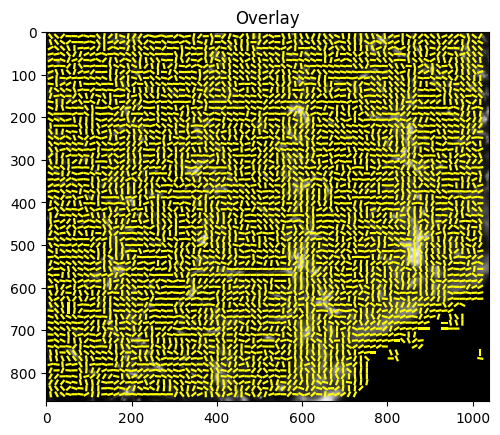

In [13]:
x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(rotated_image, window_size, overlap, save_path = data_save_path,
                                                            plot_overlay=plot_overlay, plot_angles=plot_angles, 
                                                            plot_eccentricity=plot_eccentricity,
                                                            save_figures=data_save_path)

In [24]:
import numpy as np

# Sample data (angles in degrees)
angles_deg = im_theta.reshape((im_theta.shape[0]*im_theta.shape[1],1)) * 180 / np.pi

# Define angle ranges
angle_ranges = [(0, 15), (15, 30), (30, 45), (45,60), (60,75), (75,90)]

# Initialize counts for each range
counts = np.zeros(len(angle_ranges), dtype=int)

# Count vectors in each range
for i, (start, end) in enumerate(angle_ranges):
    counts[i] = np.sum((angles_deg >= start) & (angles_deg < end))

# Print counts
for i, (start, end) in enumerate(angle_ranges):
    print(f'Number of vectors in range {start} - {end}: {counts[i]}')


Number of vectors in range 0 - 15: 1896
Number of vectors in range 15 - 30: 1796
Number of vectors in range 30 - 45: 1901
Number of vectors in range 45 - 60: 1834
Number of vectors in range 60 - 75: 1732
Number of vectors in range 75 - 90: 1788


In [25]:
angle_range = np.deg2rad(np.linspace(7.5, 82.5, len(counts)))
angle_range

array([0.13089969, 0.39269908, 0.65449847, 0.91629786, 1.17809725,
       1.43989663])

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

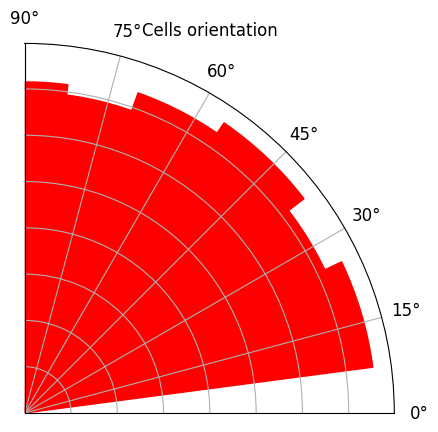

In [26]:
# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot bars for each range
bars = ax.bar(angle_range, counts, width=np.pi / 10,
            edgecolor='red', align='edge', color = 'red')

# Set 0 in the center
ax.set_theta_zero_location('E')
ax.set_thetalim(0, np.pi/2)
ax.set_theta_direction(1)
ax.set_xticks(np.deg2rad([0, 15, 30, 45, 60, 75, 90]))
ax.set_xticklabels(['0°','15°','30°','45°','60°', '75°', '90°'])
ax.set_yticklabels([])
ax.set_title('Cells orientation', fontsize =20, fontname = 'Times New Roman')

ax.tick_params(axis='both', which='major', labelsize=12, width=2, length=6, direction='inout', pad=8)

# Set font for tick labels directly
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname("Times New Roman")

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): 
    item.set_fontsize(12)
    
#plt.savefig('PolarBarOriented.png', bbox_inches='tight')
plt.show()

In [19]:
im_order_parameter = AFT.calculate_order_parameter(im_theta, neighborhood_radius)
print('The order parameter is {0}'.format(im_order_parameter))

The order parameter is 0.01742889784460159


## 5. Making the average of a group images

* `N` = Number of images per group
* `PATH` = Path to folder

In [34]:
N = 3
PATH = r'./'


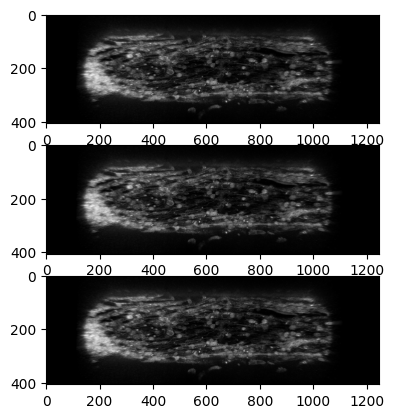

In [35]:
# load the data
import os

image_list = []

fig, axs = plt.subplots(N)

i = 0

for filename in os.listdir(PATH):
    if filename.endswith('.jpg'):
        imag = io.imread(os.path.join(PATH, filename))
        imag = rgb2gray(imag)
        axs[i].imshow(imag, cmap= 'gray')
        i += 1
        image_list.append(imag)

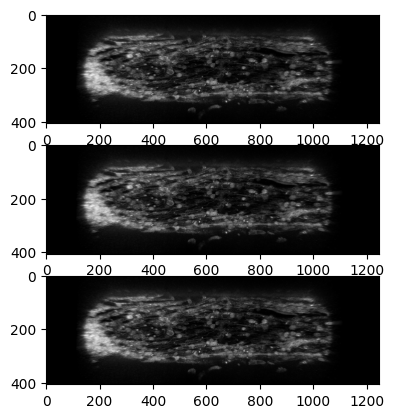

In [36]:
# Image modification
rotated_image = []

fig, axs = plt.subplots(len(image_list))

for i, imag in enumerate(image_list):
    rot = rotate_image(image = imag, 
                            angle = 0,
                            crop_factor = 1,
                            off_axis_horizontal= 0,
                            off_axis_vertical = 0)
    rotated_image.append(rot)
    axs[i].imshow(rot, cmap= 'gray')

In [37]:
import numpy as np

def count_angles(im_theta):
    # Sample data (angles in degrees)
    angles_deg = im_theta.reshape((im_theta.shape[0]*im_theta.shape[1],1)) * 180 / np.pi

    # Define angle ranges
    angle_ranges = [(-90, -70), (-70, -50), (-50, -30), (-30, -10), (-10, 10), (10, 30), (30, 50), (50, 70), (70, 90)]
    #angle_ranges = [(0, 15), (15, 30), (30, 45), (45,60), (60,75), (75,90)]

    # Initialize counts for each range
    counts = np.zeros(len(angle_ranges), dtype=int)

    # Count vectors in each range
    for i, (start, end) in enumerate(angle_ranges):
        counts[i] = np.sum((angles_deg >= start) & (angles_deg < end))

    # Print counts
    for i, (start, end) in enumerate(angle_ranges):
        print(f'Number of vectors in range {start} - {end}: {counts[i]}')
        
    return counts


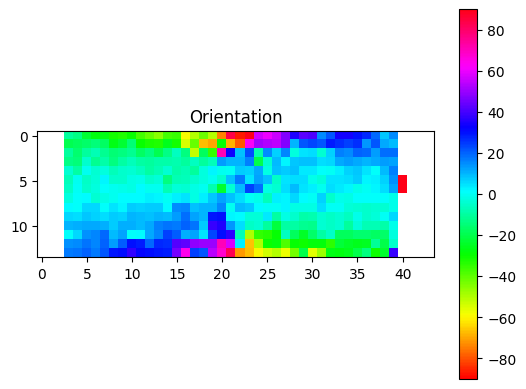

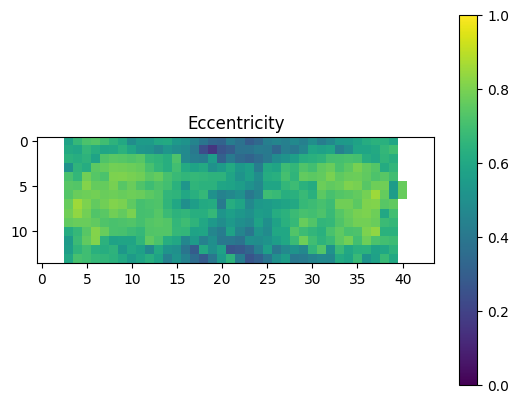

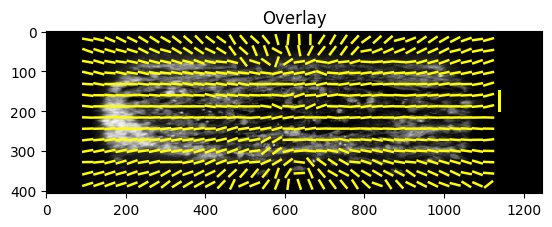

Number of vectors in range -90 - -70: 5
Number of vectors in range -70 - -50: 14
Number of vectors in range -50 - -30: 25
Number of vectors in range -30 - -10: 68
Number of vectors in range -10 - 10: 262
Number of vectors in range 10 - 30: 103
Number of vectors in range 30 - 50: 23
Number of vectors in range 50 - 70: 13
Number of vectors in range 70 - 90: 7


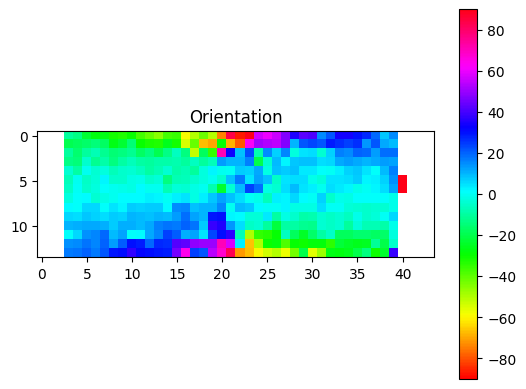

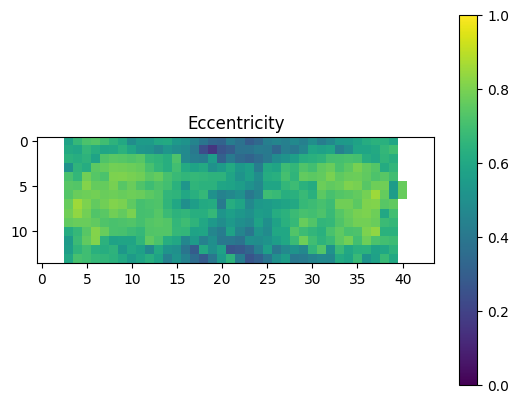

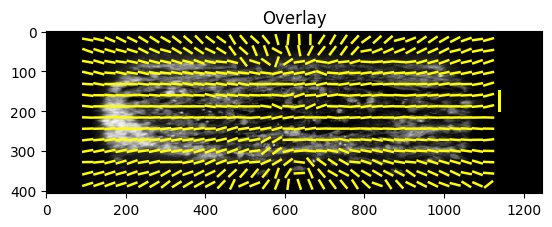

Number of vectors in range -90 - -70: 5
Number of vectors in range -70 - -50: 14
Number of vectors in range -50 - -30: 25
Number of vectors in range -30 - -10: 68
Number of vectors in range -10 - 10: 262
Number of vectors in range 10 - 30: 103
Number of vectors in range 30 - 50: 23
Number of vectors in range 50 - 70: 13
Number of vectors in range 70 - 90: 7


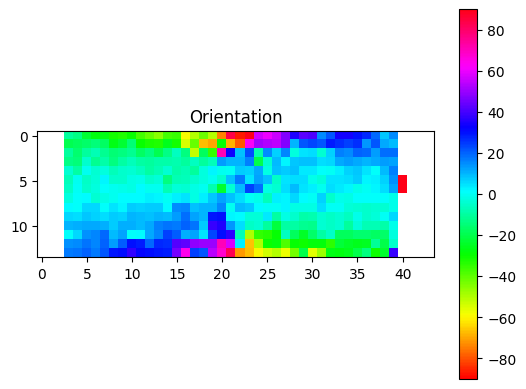

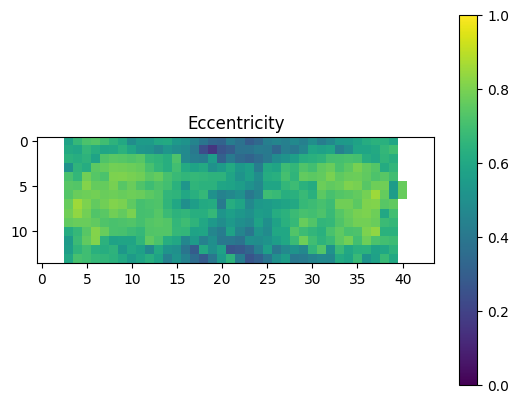

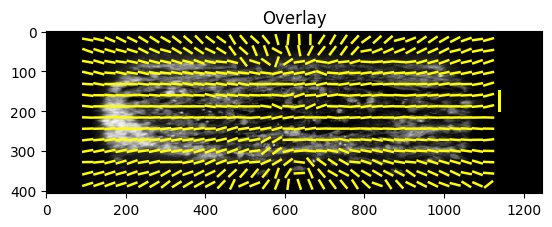

Number of vectors in range -90 - -70: 5
Number of vectors in range -70 - -50: 14
Number of vectors in range -50 - -30: 25
Number of vectors in range -30 - -10: 68
Number of vectors in range -10 - 10: 262
Number of vectors in range 10 - 30: 103
Number of vectors in range 30 - 50: 23
Number of vectors in range 50 - 70: 13
Number of vectors in range 70 - 90: 7


In [38]:
import pandas as pd

angle_range = np.deg2rad(np.linspace(-80, 80, 9))
angle_range

Data = pd.DataFrame({'Angle': np.rad2deg(angle_range)})


for i,image in enumerate(rotated_image):
    x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(image, window_size, overlap, save_path = data_save_path,
                                                            plot_overlay=plot_overlay, plot_angles=plot_angles, 
                                                            plot_eccentricity=plot_eccentricity)
    
    
    angles_vector = count_angles(im_theta = im_theta)
    Data[f'Imag {i + 1}'] = angles_vector
    
    

In [39]:
mean = 0

for column in Data.columns:
    if column == 'Angle':
        pass
    else:
        mean += Data[column]

Data['Mean'] = mean/(len(Data.columns)-1)
Data



,Angle,Imag 1,Imag 2,Imag 3,Mean
0,-80.0,5,5,5,5.0
1,-60.0,14,14,14,14.0
2,-40.0,25,25,25,25.0
3,-20.0,68,68,68,68.0
4,0.0,262,262,262,262.0
5,20.0,103,103,103,103.0
6,40.0,23,23,23,23.0
7,60.0,13,13,13,13.0
8,80.0,7,7,7,7.0


In [40]:
suma = Data['Mean'].sum()

Data['Percentage'] = (Data['Mean']/suma)*100
Data

,Angle,Imag 1,Imag 2,Imag 3,Mean,Percentage
0,-80.0,5,5,5,5.0,0.961538
1,-60.0,14,14,14,14.0,2.692308
2,-40.0,25,25,25,25.0,4.807692
3,-20.0,68,68,68,68.0,13.076923
4,0.0,262,262,262,262.0,50.384615
5,20.0,103,103,103,103.0,19.807692
6,40.0,23,23,23,23.0,4.423077
7,60.0,13,13,13,13.0,2.500000
8,80.0,7,7,7,7.0,1.346154


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

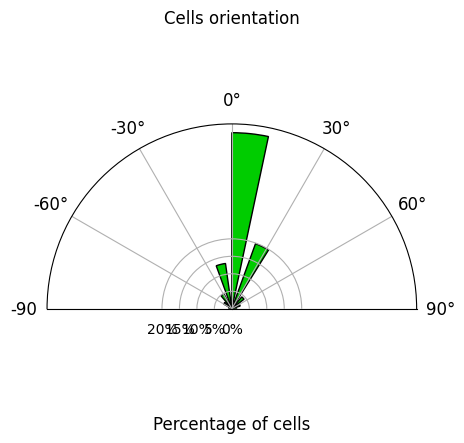

In [41]:
# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot bars for each range
bars = ax.bar(angle_range, Data['Percentage'], width=np.pi / 15,
            edgecolor='black', align='edge', color = '#00CC00')

# Set 0 in the center
ax.set_theta_zero_location('N')
ax.set_thetalim(-np.pi/2, np.pi/2)
ax.set_theta_direction(-1)
ax.set_xticks(np.deg2rad([-90, -60, -30, 0, 30, 60, 90]))
ax.set_xticklabels(['-90', '-60°', '-30°', '0°','30°','60°', '90°'])
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
ax.set_xlabel('Percentage of cells',  fontname="Times New Roman", labelpad=10)
ax.set_title('Cells orientation', fontsize =25, fontname = 'Times New Roman')

ax.tick_params(axis='both', which='major', labelsize=10, width=2, length=4, direction='inout', pad=8)

# Set font for tick labels directly
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname("Times New Roman")

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): 
    item.set_fontsize(12)

#plt.savefig('PolarBarOriented.png', bbox_inches='tight')
plt.show()

[np.float64(10.0), np.float64(20.0), np.float64(30.0), np.float64(40.0), np.float64(50.0), np.float64(60.0)]


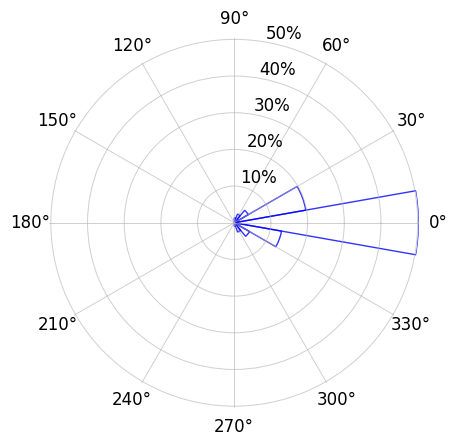

In [42]:
# Create polar plot
ax = plt.subplot(projection= 'polar')

# Plot bars for each range

ax.set_rlabel_position(80)
ax.set_xticks(np.deg2rad([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]))
ax.grid(linewidth=0.7, alpha=0.6, zorder=1)  # Make grid lines fainter

bars = ax.bar(angle_range, Data['Percentage'], width=np.pi / 9, edgecolor='b', linewidth=1, bottom=0.0, color='none', alpha=0.8)
print(ax.get_yticks())

ax.set_yticks([x for x in ax.get_yticks() if x <= max(Data['Percentage'])])
ax.set_ylim(0, max(Data['Percentage']))  # Set y-axis limit

ax.set_yticklabels([f"{int(y)}%" for y in ax.get_yticks()])  # Format labels as percentages

ax.spines['polar'].set_visible(False)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): 
    item.set_fontsize(12)

plt.show()

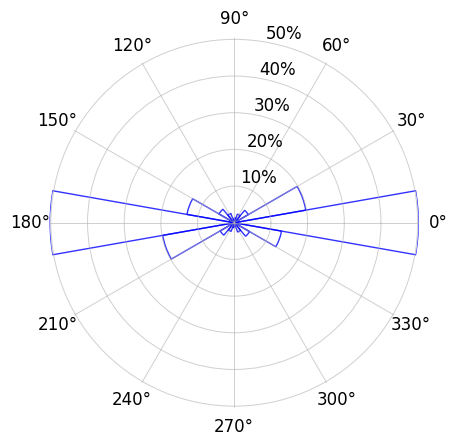

In [43]:
# Create polar plot
ax = plt.subplot(projection= 'polar')

# Plot bars for each range
ax.set_rlabel_position(80)
ax.set_xticks(np.deg2rad([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]))
ax.grid(linewidth=0.7, alpha=0.6, zorder=1)  # Make grid lines fainter

bars = ax.bar(np.concatenate([angle_range, angle_range + np.pi]), np.concatenate([Data['Percentage'], Data['Percentage']]), width=np.pi / 9, edgecolor='b', linewidth=1, bottom=0.0, color='none', alpha=0.8)

ax.set_yticks([x for x in ax.get_yticks() if x <= max(Data['Percentage'])])
ax.set_ylim(0, max(Data['Percentage']))  # Set y-axis limit
ax.set_yticklabels([f"{int(y)}%" for y in ax.get_yticks()])  # Format labels as percentages
ax.spines['polar'].set_visible(False)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): 
    item.set_fontsize(12)

plt.show()

[np.float64(10.0), np.float64(20.0), np.float64(30.0), np.float64(40.0), np.float64(50.0), np.float64(60.0)]


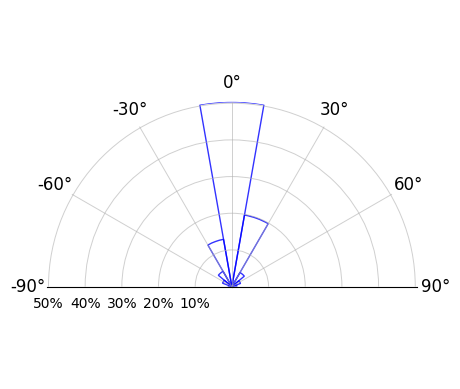

In [44]:
# Create polar plot
ax = plt.subplot(projection= 'polar')

# Plot bars for each range

ax.set_rlabel_position(80)
ax.grid(linewidth=0.7, alpha=0.6, zorder=1)  # Make grid lines fainter

bars = ax.bar(angle_range, Data['Percentage'], width=np.pi / 9, edgecolor='b', linewidth=1, bottom=0.0, color='none', alpha=0.8)

# y_limit = np.ceil(max_value / 10) * 10  # Round up to the nearest 10
ax.set_ylim(0, max(Data['Percentage']))  # Set y-axis limit
print(ax.get_yticks())

ax.set_yticks([x for x in ax.get_yticks() if x <= max(Data['Percentage'])])
ax.set_yticklabels([f"{int(y)}%" for y in ax.get_yticks()])  # Format labels as percentages

ax.spines['polar'].set_visible(False)

# Set 0 in the center
ax.set_theta_zero_location('N')
ax.set_thetalim(-np.pi/2, np.pi/2)
ax.set_theta_direction(-1)
ax.set_xticks(np.deg2rad([-90, -60, -30, 0, 30, 60, 90]))

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): 
    item.set_fontsize(12)

plt.show()